In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
insurance_df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA

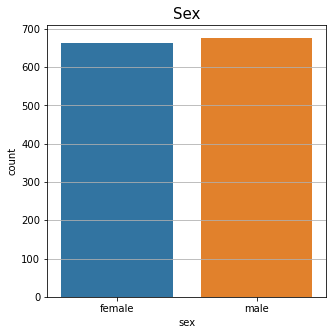

In [4]:
plt.figure(figsize=(5,5))
plt.grid()
sns.countplot(x='sex', data= insurance_df)
plt.title("Sex", fontsize=15)
plt.show()

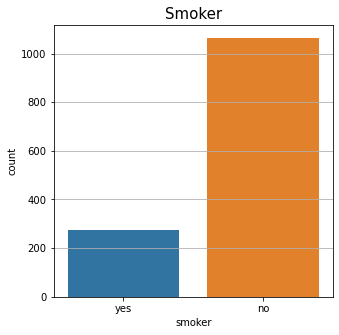

In [5]:
plt.figure(figsize=(5,5))
plt.grid()
sns.countplot(x='smoker', data= insurance_df)
plt.title("Smoker", fontsize=15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


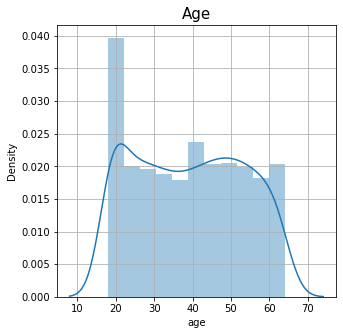

The maximum age is 64
The minimum age is 18
The average age is 39.20702541106129
With an exceptionally high population at age 18


In [6]:
plt.figure(figsize=(5,5))
plt.grid()
sns.distplot(insurance_df['age'])
plt.title("Age", fontsize=15)
plt.show()

print('The maximum age is {}'.format(insurance_df['age'].max()))
print('The minimum age is {}'.format(insurance_df['age'].min()))
print('The average age is {}'.format(insurance_df['age'].mean()))
print('With an exceptionally high population at age {}'.format(int(insurance_df['age'].mode())))

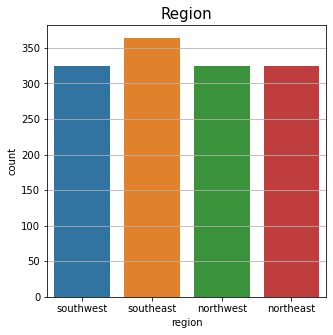

In [7]:
plt.figure(figsize=(5,5))
plt.grid()
sns.countplot(x='region', data= insurance_df)
plt.title("Region", fontsize=15)
plt.show()

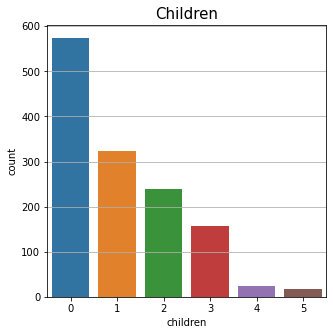

In [8]:
plt.figure(figsize=(5,5))
plt.grid()
sns.countplot(x='children', data= insurance_df)
plt.title("Children", fontsize=15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


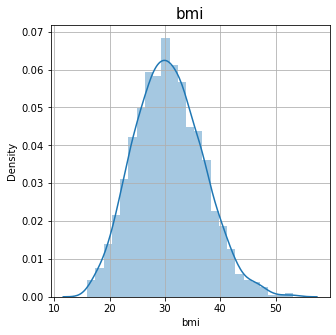

the max bmi is:  53.13
the min bmi is:  15.96
the average bmi is:  30.663396860986538


In [9]:
# displot
plt.figure(figsize=(5,5))
plt.grid()
sns.distplot(insurance_df['bmi'])
plt.title("bmi", fontsize=15)
plt.show()
print("the max bmi is: ",insurance_df['bmi'].max())
print("the min bmi is: ",insurance_df['bmi'].min())
print("the average bmi is: ",insurance_df['bmi'].mean())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


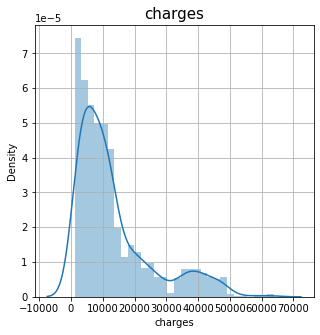

the max charges is:  63770.42801
the min charges is:  1121.8739
the average charges is:  13270.422265141257


In [10]:
# displot
plt.figure(figsize=(5,5))
plt.grid()
sns.distplot(insurance_df['charges'])
plt.title("charges", fontsize=15)
plt.show()
print("the max charges is: ",insurance_df['charges'].max())
print("the min charges is: ",insurance_df['charges'].min())
print("the average charges is: ",insurance_df['charges'].mean())

## Regression Model Run

In [11]:
X = insurance_df.drop('charges',axis=1)
y = insurance_df['charges']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


categorical_cols = [cname for cname in X_train.columns if 
                    X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]
print(categorical_cols)
print(numerical_cols)

['sex', 'smoker', 'region']
['age', 'bmi', 'children']


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
RFR = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
model_1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', RFR)
                     ])

# Preprocessing of training data, fit model 
model_1.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = model_1.predict(X_test)

print('Score:',model_1.score(X_test, y_test) * 100)

print('MAE:', mean_absolute_error(y_test, preds))

Score: 84.7759685348058
MAE: 2608.8314427533332
